In [21]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
import random
import math
from functools import reduce
import numpy as np

import gameBoard as gb


from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.gridspec as gridspec

import matplotlib.transforms as mtransforms
import matplotlib.patches as mpatch
from matplotlib.patches import FancyBboxPatch

%config InlineBackend.figure_formats = ['svg']
import matplotlib.pyplot as plt
import matplotlib.style as mplstyle
mplstyle.use('fast')
mplstyle.use('default')
# mpl.rcParams['figure.figsize'] = [20, 10]

colors = ["lightgreen","yellow", "red"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)


class MathError(Exception):
    pass

In [22]:
max_step_count = 25
game_length = 14

(-2.6, -0.4, -2.289, 15.289)

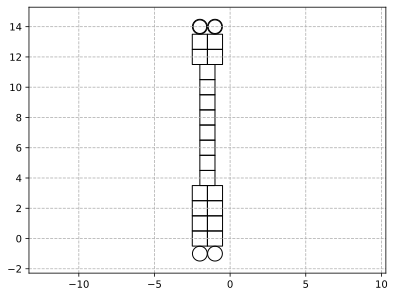

In [23]:
moveset = {"stay":0,
            "up1":1,
            "up2":2,
            "up3":3,
            "goback":-1
            }


# plt.plot((0,max_step_count),(game_length,game_length), label='gamelength')  # Plot some data on the (implicit) axes.
# plt.plot((max_step_count,max_step_count),(0,game_length), label='maxsteps')  # Plot some data on the (implicit) axes.
plt.grid(True)
# plt.legend()
ax = plt.subplot(111)
plt.grid(zorder=-10,ls="--")
gb_coll = gb.getGameboard(4,8,2, xoff=2)
ax.add_collection(gb_coll)
plt.axis('equal')

In [24]:
prob_stay = 1/8
prob_p1 = 3/8
prob_p2 = 3/8
prob_p3 = 1/8



In [25]:
movedist = 1
dicecount = 4
movedist = 4
laststep = np.ones_like(range(16), np.longdouble)
mask = np.ones_like(range(16), np.longdouble)
mask.put(range(movedist),0)
laststep * mask

(1/2)**dicecount
math.comb(dicecount,movedist)*(1/2)**dicecount

0.0625

In [26]:
def calc_prob_move(laststep: np.array, movedist: int, dicecount: int):
    # print("Prob {} out of {}!".format(movedist,dicecount))
    if movedist > dicecount:
        raise MathError("Cant take {} out of {}!".format(movedist, dicecount))
    else:
        # print(laststep)
        step_rolled = np.roll(laststep, movedist)
        # print(step_rolled)
        step_mask = np.ones_like(range(len(laststep)), np.longdouble)
        step_mask.put(range(movedist), 0)
        # print("mask {}".format(step_mask))
        if movedist == 0:
            prob = np.prod([np.ones_like(range(len(laststep)), np.longdouble),
                           math.comb(dicecount, movedist),
                           (1/2)**dicecount],  axis=0)
            prob.put([-1], 1)

        else:
            prob = math.comb(dicecount, movedist)*(1/2)**dicecount

        return step_rolled*step_mask*prob
def calc_prob_blocked_move(laststep: np.array, movedist: int, dicecount: int):
    # print("Prob {} out of {}!".format(movedist,dicecount))
    if movedist > dicecount:
        raise MathError("Cant take {} out of {}!".format(movedist, dicecount))
    else:
        # print(laststep)
        step_rolled = np.roll(laststep, movedist)
        # print(step_rolled)
        step_mask = np.ones_like(range(len(laststep)), np.longdouble)
        step_mask.put(range(movedist), 0)
        # print("mask {}".format(step_mask))
        if movedist == 0:
            prob = np.prod([np.ones_like(range(len(laststep)), np.longdouble),
                           math.comb(dicecount, movedist),
                           (1/2)**dicecount],  axis=0)
            prob.put([-1], 1)

        else:
            prob = math.comb(dicecount, movedist)*(1/2)**dicecount

        return step_rolled*step_mask*prob


def calc_props(laststep: np.array, dicecount: int) -> np.array:
    cr = np.zeros_like(range(len(laststep)), np.longdouble)
    for movedist in range(dicecount):
        cr += calc_prob_move(laststep, movedist, dicecount)
    return cr


In [27]:
rounds = [np.zeros_like(range(-1,16), np.longdouble)]
currentround = 0
rounds[0][0] = 1
# while np.min(np.ma.masked_equal(rounds[currentround], 0.0, copy=False)) > .01:
for r in range(100):
    rounds.append(calc_props(rounds[r],4))
    
print(len(rounds))
type(rounds[100][0])
np.flipud(np.array(rounds).T)[16]
np.asarray(np.flipud(np.array(rounds).T)[16],dtype=np.float)

101


C:\Users\walli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-27-7c62294b39c4>:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(np.flipud(np.array(rounds).T)[16],dtype=np.float)


array([1.00000000e+000, 6.25000000e-002, 3.90625000e-003, 2.44140625e-004,
       1.52587891e-005, 9.53674316e-007, 5.96046448e-008, 3.72529030e-009,
       2.32830644e-010, 1.45519152e-011, 9.09494702e-013, 5.68434189e-014,
       3.55271368e-015, 2.22044605e-016, 1.38777878e-017, 8.67361738e-019,
       5.42101086e-020, 3.38813179e-021, 2.11758237e-022, 1.32348898e-023,
       8.27180613e-025, 5.16987883e-026, 3.23117427e-027, 2.01948392e-028,
       1.26217745e-029, 7.88860905e-031, 4.93038066e-032, 3.08148791e-033,
       1.92592994e-034, 1.20370622e-035, 7.52316385e-037, 4.70197740e-038,
       2.93873588e-039, 1.83670992e-040, 1.14794370e-041, 7.17464814e-043,
       4.48415509e-044, 2.80259693e-045, 1.75162308e-046, 1.09476443e-047,
       6.84227766e-049, 4.27642354e-050, 2.67276471e-051, 1.67047794e-052,
       1.04404871e-053, 6.52530447e-055, 4.07831529e-056, 2.54894706e-057,
       1.59309191e-058, 9.95682444e-060, 6.22301528e-061, 3.88938455e-062,
       2.43086534e-063, 1

<ipython-input-28-69bf722c3505>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(["start"]+list(range(0,15))+["end"])
<ipython-input-28-69bf722c3505>:19: RuntimeWarning: divide by zero encountered in log10
  log_rounds = np.log10(np.array(rounds).T)


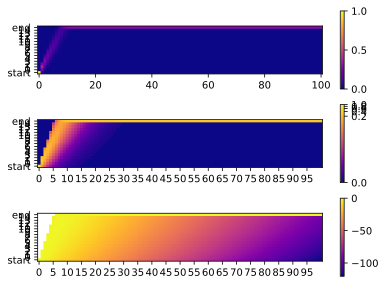

In [28]:
fig, ax = plt.subplots()
ax1 = plt.subplot(311)
# im = ax.imshow(np.rot90(np.array(rounds)))
# im = ax.imshow(np.flipud(np.array(rounds)))
im = ax1.imshow(np.array(rounds).T,origin="lower", cmap=plt.get_cmap("plasma"))
ax1.set_yticklabels(["start"]+list(range(0,15))+["end"])
ax1.set_yticks(range(0,17))
plt.colorbar(im,ax=ax1)


ax2 = fig.add_subplot(312)
im = ax2.imshow(np.array(rounds).T,origin="lower", norm=mpl.colors.PowerNorm(.1), cmap=plt.get_cmap("plasma"))
ax2.set_yticks(range(0,17))
ax2.set_yticklabels(["start"]+list(range(0,15))+["end"])
ax2.set_xticks(range(0,100,5))
plt.colorbar(im,ax=ax2)

ax3 = fig.add_subplot(313)
log_rounds = np.log10(np.array(rounds).T)

im = ax3.imshow(log_rounds, origin="lower", cmap=plt.get_cmap("plasma"))
ax3.set_yticks(range(0,17))
ax3.set_yticklabels(["start"]+list(range(0,15))+["end"])
ax3.set_xticks(range(0,100,5))
plt.colorbar(im,ax=ax3)


# np.flipud(np.array(rounds).T)
# ax.axis("off")

In [29]:
X, Y = np.mgrid[-1:14:16, 0:100:101]
np_rounds = np.array(rounds)
# A low hump with a spike coming out of the top right.  Needs to have
# z/colour axis on a log scale so we see both hump and spike.  linear
# scale only shows the spike.
Z = np_rounds[X][Y]
Z
# fig, ax = plt.subplots(2, 1)

# pcm = ax[0].pcolormesh(X, Y, Z,
#                    norm=mpl.colors.LogNorm(0, vmax=1),
#                    cmap='PuBu_r', shading='auto')
# fig.colorbar(pcm, ax=ax[0], extend='max')


array([[[[3.87259191e-121, 1.54903677e-118, 3.09032835e-116,
          4.09983561e-114, 4.06908645e-112, 3.22271524e-110,
          2.12161885e-108, 1.19416605e-106, 5.86632119e-105,
          2.55509517e-103, 9.99034223e-102, 3.54198997e-100,
          1.14817705e-098, 3.42679514e-097, 9.47238301e-096,
          2.43747545e-094, 2.85900676e-001]]]], dtype=float64)

In [30]:

# source = np.array([np.arange(10)])
source = np.array(np.zeros(10,np.longdouble))
source.put(0,100)
# source = np.eye(10).T

probs_base = (1/2)**dicecount
binomCoef = np.asarray([[math.comb(dicecount, md)
                     for md in range(dicecount+1)]])


def calcStayMatrixExactFinish(gamelength:int,dicecount:int):
     probs_base = (1/2)**dicecount
     binomCoef = np.asarray([math.comb(dicecount, movedist)
                             for movedist in range(dicecount+1)])
     # M_p1 = np.pad(M, [0, dicecount-movedist])
     # return np.pad(M_p1,[game_length-dicecount,0])
     # return np.pad(M,[gamelength-movedist,0])
     singleStayMatrices = [np.pad(np.eye(movedist) * probs_base * binomCoef[movedist], [gamelength-movedist, 0])
                           for movedist in range(dicecount+1)]
     return reduce((lambda x, y: x+y), singleStayMatrices)

def calcMoveMatrix(gamelength:int,dicecount:int):
     probs_base = (1/2)**dicecount
     binomCoef = np.asarray([math.comb(dicecount, md)
                              for md in range(dicecount+1)])
     singleMoveMatrices = [np.eye(gamelength, k=-movedist)*probs_base*binomCoef[movedist]
                           for movedist in range(dicecount+1)]
     return reduce((lambda x, y: x+y), singleMoveMatrices)




a = calcMoveMatrix(10,4)

stay_at_end = calcStayMatrixExactFinish(10, 4)
# a = np.pad(a,[[0,1],[0,1]])
# a[9].put(9,1)



# np.matmul(b,source.T)
# t1 = np.matmul(a,source.T)
# # np.matmul(a,t1).sum()
# np.matmul(a,t1)
# # np.matmul()
c = np.linalg.matrix_power(a+stay_at_end,1).T
np.flipud(np.matmul(source,c)).T

# calcStayMatrixExactFinish(10,4)

array([ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  6.25, 25.  , 37.5 , 25.  ,
        6.25], dtype=float64)

In [31]:
source = np.array(np.zeros(16,np.double))
source.put(0,1)

runs = 501

In [32]:
move_matrix = (calcMoveMatrix(16,4)+calcStayMatrixExactFinish(16,4)).T

In [33]:
hm_1 = []
for i in range(runs):
    if i % 1000000 == 0:
        print(i)
    hm_1.append(np.matmul(source,np.linalg.matrix_power(move_matrix,i)))
np.shape(hm_1)


0


(501, 16)

In [34]:
hm_2=[]
cr = source.copy()
hm_2.append(cr)
for i in range(runs-1):
    if i % 1000000 == 0:
        print(i)
    cr = np.matmul(cr, move_matrix)
    hm_2.append(cr)
np.shape(hm_2)

0


(501, 16)

In [35]:
np.shape(hm_1)
# hm_1[100000] == hm_2[100000]
hm_2[50].sum()

hm_3 = np.asarray(hm_1) - np.asarray(hm_2)

<ipython-input-41-a9e97d5112e3>:11: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(np.array(data))
<ipython-input-41-a9e97d5112e3>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_yticklabels(["start"]+list(range(0,15))+["end"])


TypeError: float() argument must be a string or a number, not 'PatchCollection'

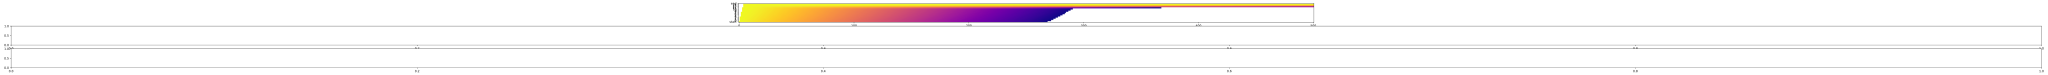

In [41]:

def draw_heatmaps(data_list,log_scale=True):
    fig, ax = plt.subplots(len(data_list), 1, figsize=(
        len(data_list)*40, len(data_list)*40*np.shape(hm_1)[1]/np.shape(hm_1)[0]))
    gb_coll = gb.getGameboard(4, 8, 2, xoff=2)


    for i, data in enumerate(data_list, 0):
        # ax = plt.subplot(len(data_list),1,i)
        data = np.array(data).T
        if log_scale:
            data = np.log10(np.array(data))
        im = ax[i].imshow(data, origin="lower", cmap=plt.get_cmap(
            "plasma"), interpolation='none')

        ax[i].set_yticklabels(["start"]+list(range(0,15))+["end"])
        ax[i].set_yticks(range(0, 17))
        # ax[i].add_collection(gb_coll)
        # ax[i].autoscale(False)
        # ax[i].plot(gb_coll)

        # cax = fig.add_axes([ax.get_position().x1+0.01,
        #                    ax.get_position().y0, 0.02, ax.get_position().height])
        # plt.colorbar(im, cax=cax)  # Similar to fig.colorbar(im, cax = cax)
    cax = fig.add_axes([ax[len(ax)-1].get_position().x1+0.01, ax[len(ax)-1].get_position().y0,
                    0.02, ax[0].get_position().y1-ax[len(ax)-1].get_position().y0])
    print([ax[len(ax)-1].get_position().x1+0.01, ax[len(ax)-1].get_position().y0,
           0.02, ax[0].get_position().y1-ax[len(ax)-1].get_position().y0])
    fig.colorbar(im,cax=cax)
    # return fig
# ax3 = fig.add_subplot(313)
# log_rounds = np.log10(np.array(rounds).T)


# im = ax3.imshow(log_rounds, origin="lower", cmap=plt.get_cmap("plasma"))
# ax3.set_yticks(range(0,17))
# ax3.set_yticklabels(["start"]+list(range(0,15))+["end"])
# ax3.set_xticks(range(0,100,5))
# plt.colorbar(im,ax=ax3)
data_list = [hm_1, hm_2, hm_3]
draw_heatmaps(data_list)

1
2
3
4
5
6
7
8
9
10


<ipython-input-17-4ac2ba925dfa>:8: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(np.array(data))
<ipython-input-17-4ac2ba925dfa>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_yticklabels(["start"]+list(range(0,15))+["end"])


[0.6803131871849522, 0.1100000000000001, 0.02, 0.7699999999999999]


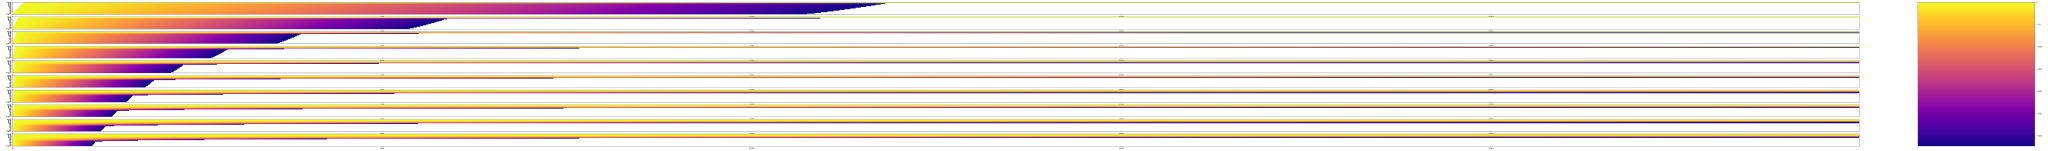

In [ ]:
data = []
runs = 2500

for c_round in range(1,11):
    move_matrix = (calcMoveMatrix(16, c_round) +
                   calcStayMatrixExactFinish(16, c_round)).T
    cr = source.copy()
    data.append([])
    print(c_round)
    for i in range(runs-1):
        data[c_round-1].append(cr)
        cr = np.matmul(cr, move_matrix)
# draw_heatmaps(data,False)
draw_heatmaps(data)
# data[0:1]

